In [1]:
"""
# Define pitch
F = [0,1,0] ; E_sharp = [0,1,0]
C = [1,0,1] ; B_sharp = [1,0,1] 
G = [0,-1,2]
D = [-1,0,3]
A = [0,1,4]
E = [1,0,5]  ; F_flat = [1,0,5]
B = [0,-1,6]  ; C_flat = [0,-1,6]
F_sharp = [-1,0,7] ; G_flat = [-1,0,7]
C_sharp = [0,1,8] ; D_flat = [0,1,8]
G_sharp = [1,0,9] ; A_flat = [1,0,9]
D_sharp = [0,-1,10] ; E_flat = [0,-1,10]
A_sharp = [-1,0,11] ; B_flat = [-1,0,11]
"""
print()

In [163]:
import librosa
import os, sys
import numpy as np
from pydub import AudioSegment
from pydub.utils import make_chunks
import warnings
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import itertools
from librosa import display
warnings.filterwarnings('ignore')

In [2]:
pitch_ary = [[1,0,1], [0,1,8], [-1,0,3], [0,-1,10], [1,0,5], [0,1,0], [-1,0,7],\
                 [0,-1,2], [1,0,9], [0,1,4], [-1,0,11], [0,-1,6]]
pitch_ary = np.array(pitch_ary)

## get all clip 
def get_dirs(path):
    dirs = os.listdir(path)
    return dirs  # file list

def pitch_trans(seq):
    pitch_list = ['C','C#','D','D#(E-)','E','F','F#','G','G#','A','A#(B-)','B']
    return pitch_list[seq]

def pitch_to_ary(notes):
    pitch_ary = [[1,0,1], [0,1,8], [-1,0,3], [0,-1,10], [1,0,5], [0,1,0], [-1,0,7],\
                 [0,-1,2], [1,0,9], [0,1,4], [-1,0,11], [0,-1,6]]
    pitch_ary = np.array(pitch_ary)
    return pitch_ary[notes]


## count CE
def count_CE(notes_seq):
    c = Counter(notes_seq)
    Dab = 0
    sum_dp = 0
    for i in range(len(notes_seq)):
        pij = (pitch_to_ary(notes_seq[i]))
        dij = 1
        Dab = sum(c.values())
        sum_dp += (dij * pij)  
        CE = sum_dp/Dab   
    return CE

def get_key(CE, pitch_ary):
    key = []
    for i in range(len(pitch_ary)):
        key.append(abs(pitch_ary[i][0]-int(CE[0])) + abs(pitch_ary[i][1]-int(CE[1])) + \
                  abs(pitch_ary[i][2]-int(CE[2])))
    predict_key = pitch_trans(key.index(min(key)))
    return predict_key

In [359]:
## Analysis chord and pitch
def n_gram(key_list, ngram):
    ngram_key = []
    flattened = [val for sublist in key_list for val in sublist]
    for i in range(int(len(flattened)/ngram)):
        ngram_key.append(flattened[ngram*i : ngram*(i+1)])
    count_ngram = dict([])
    for i in ngram_key:
        i=str(i)
        if i in count_ngram:
            count_ngram[i] += 1
        else:
            count_ngram[i] = 1
    return count_ngram

## key matching
perfect_five = [['C','G'],['G','D'],['D','A'],['A','E'],['E','B'],['B','F#'],['F#','C#'],['C#','G#'],
                ['G#','D#(E-)'],['D#(E-)','A#(B-)'],['A#(B-)','F'],['F','C']]
same_pitch = [['C','C','C'],['D','D','D'],['A','A','A'],['E','E','E'],['B','B','B'],['F#','F#','F#'],
              ['C#','C#','C#'],['G#','G#','G#'], ['D#(E-)','D#(E-)','D#(E-)'],
              ['A#(B-)','A#(B-)','A#(B-)'],['F','F','F'],['G','G','G']]
big_three = [['C','E'],['D','F#'],['E','G#'],['F','A'],['G','B'],['A','C#'],['B','D#'],
             ['C#','F'],['D#(E-)','G'],['F#','A#(B-)'],['G#','C'],['A#','D']]
small_three = [['C','D#'],['D','F'],['E','G'],['F','G#'],['G','A#'],['A','C'],['B','D'],
             ['C#','E'],['D#(E-)','F#'],['F#','A'],['G#','B'],['A#','C#']]

In [362]:
a = n_gram(pitch,4)

In [363]:
a

{"['F', 'F', 'A', 'C']": 1,
 "['C', 'C', 'C', 'C']": 691,
 "['C', 'A', 'A', 'C']": 14,
 "['A', 'A', 'A', 'A']": 443,
 "['C', 'C', 'C', 'A']": 31,
 "['A', 'C', 'C', 'C']": 28,
 "['G', 'C', 'C', 'G']": 20,
 "['G', 'G', 'C', 'G']": 30,
 "['G', 'G', 'G', 'G']": 301,
 "['G', 'G', 'G', 'C']": 48,
 "['C', 'G', 'C', 'C']": 43,
 "['G', 'C', 'G', 'C']": 15,
 "['G', 'C', 'C', 'C']": 53,
 "['C', 'C', 'G', 'C']": 37,
 "['C', 'C#', 'C', 'C']": 7,
 "['C', 'F', 'C', 'A']": 4,
 "['A', 'A', 'C', 'C']": 25,
 "['C', 'A', 'A', 'F']": 5,
 "['C', 'C', 'C', 'G']": 55,
 "['C', 'C', 'F', 'G']": 1,
 "['C', 'C', 'G', 'F']": 3,
 "['C', 'F', 'A#(B-)', 'A#(B-)']": 4,
 "['A#(B-)', 'A#(B-)', 'A#(B-)', 'A#(B-)']": 85,
 "['A#(B-)', 'A#(B-)', 'A#(B-)', 'D']": 2,
 "['D', 'A#(B-)', 'A#(B-)', 'A']": 2,
 "['A', 'A', 'A#(B-)', 'A']": 1,
 "['A', 'A', 'D', 'F']": 3,
 "['F', 'F', 'F', 'F']": 183,
 "['F', 'F', 'F', 'A#(B-)']": 7,
 "['D', 'D', 'D', 'D']": 468,
 "['A#(B-)', 'D', 'D', 'D']": 8,
 "['D', 'D', 'D', 'A#(B-)']": 4,
 "['F

In [15]:
## get all file name
sleeping_music = sorted(get_dirs('./music/sleeping'))

### Get Chord (4 beats)

In [17]:
sleeping_key = []; pitch = []
def job(num1, num2):
#     for idx in range(len(sleeping_music)):
    for idx in range(num1, num2):
        temp2 = []; temp3 = []
        for i in range(60):
            try:
                y1, sr = librosa.load('./music/sleeping/'+ sleeping_music[idx],offset=4*i,duration = 4, res_type = "kaiser_fast")
                ## onset detection
                o_env = librosa.onset.onset_strength(y1, sr=sr)
                onset_frames = librosa.onset.onset_detect(y=y1, onset_envelope=o_env, sr=sr)

                ## pitch detection
                b = librosa.feature.chroma_stft(y=y1, sr=sr, n_fft=1024, hop_length=512)

                temp =[]
                for i in range(len(onset_frames)): 
                    temp.append(np.argsort(b[:,onset_frames[i]])[-1])  
                for i in range(len(temp)):
                    temp3.append(pitch_trans(temp[i]))    

                ## count CE
                CE = (count_CE(temp))
                temp2.append(get_key(CE, pitch_ary))
            except:
                pass
        sleeping_key.append(temp2)
        pitch.append(temp3)
        print("Finish", idx)

In [18]:
import threading
import time

## multi thread

threads = []
threads2 = []
threads3 = []
threads4 = []

threads.append(threading.Thread(target = job, args = (0,12))) 
for t in threads:
    t.start()
    
threads2.append(threading.Thread(target = job, args = (12,24))) 
for t2 in threads2:
    t2.start()
    
threads3.append(threading.Thread(target = job, args = (24,38))) 
for t2 in threads3:
    t2.start()
    
threads4.append(threading.Thread(target = job, args = (38,51))) 
for t2 in threads4:
    t2.start()

In [30]:
len(sleeping_key)

51

## Analysis - Chord

In [26]:
## Chord progression
for idx in range(len(sleeping_music)):
    perfect = 0; same = 0; non = 0; big3 = 0; small3 = 0
    perfect_ = 0; same_ = 0; non_ = 0; big3_ = 0; small3_ = 0
    for i in range(len(sleeping_key[idx])):
        if sleeping_key[idx][i:i+2] in perfect_five:
            perfect = perfect+1
        elif sleeping_key[idx][i:i+2] in big_three:
            big3 = big3+1
        elif sleeping_key[idx][i:i+2] in small_three:
            small3 = small3+1
        else:
            non = non+1
    for i in range(len(sleeping_key[idx])):
        if sleeping_key[idx][i:i+3] in same_pitch:
            same = same+1
    try:
        perfect_ = round(perfect/len(sleeping_key[idx]) *100,2)
        same_ = round(same/len(sleeping_key[idx]) *100,2)
        non_ = round(non/len(sleeping_key[idx]) *100,2)
        big3_ = round(big3/len(sleeping_key[idx]) *100,2)
        small3_ = round(small3/len(sleeping_key[idx]) *100,2)
    except:
        pass
    print(idx,sleeping_music[idx])
    print("Perfect 5:", perfect_, '%')
    print("Big three:",big3_, '%')
    print("Small",small3_, '%')
    print("Stable:",same_, '%')
    print("Other",non_, '%')
    print()

0 m1.wav
Perfect 5: 15.0 %
Big three: 3.33 %
Small 5.0 %
Stable: 10.0 %
Other 76.67 %

1 m10.wav
Perfect 5: 21.67 %
Big three: 0.0 %
Small 0.0 %
Stable: 20.0 %
Other 78.33 %

2 m11.wav
Perfect 5: 28.33 %
Big three: 0.0 %
Small 1.67 %
Stable: 5.0 %
Other 70.0 %

3 m12_c.wav
Perfect 5: 15.0 %
Big three: 1.67 %
Small 5.0 %
Stable: 15.0 %
Other 78.33 %

4 m13_c.wav
Perfect 5: 11.67 %
Big three: 0.0 %
Small 5.0 %
Stable: 5.0 %
Other 83.33 %

5 m14_c.wav
Perfect 5: 31.67 %
Big three: 0.0 %
Small 5.0 %
Stable: 8.33 %
Other 63.33 %

6 m15.wav
Perfect 5: 13.33 %
Big three: 1.67 %
Small 8.33 %
Stable: 3.33 %
Other 76.67 %

7 m16.wav
Perfect 5: 20.0 %
Big three: 0.0 %
Small 1.67 %
Stable: 10.0 %
Other 78.33 %

8 m17.wav
Perfect 5: 21.67 %
Big three: 0.0 %
Small 1.67 %
Stable: 21.67 %
Other 76.67 %

9 m18.wav
Perfect 5: 25.0 %
Big three: 0.0 %
Small 0.0 %
Stable: 23.33 %
Other 75.0 %

10 m19.wav
Perfect 5: 28.33 %
Big three: 0.0 %
Small 1.67 %
Stable: 13.33 %
Other 70.0 %

11 m2.wav
Perfect 5: 25.

IndexError: list index out of range

## Analysis - Pitch

In [353]:
## Check if it has a dominant key
for idx in range(len(sleeping_music)):
    print(idx, n_gram(pitch[idx], 1))
    print()

0 {"['F']": 203, "['A']": 236, "['C']": 511, "['G']": 121, "['C#']": 8, "['A#(B-)']": 128, "['D']": 122, "['D#(E-)']": 11, "['F#']": 2, "['E']": 126, "['B']": 5}

1 {"['A']": 469, "['G#']": 101, "['B']": 73, "['C#']": 87, "['E']": 158, "['F#']": 75, "['A#(B-)']": 1, "['D#(E-)']": 2, "['C']": 1}

2 {"['C']": 474, "['D']": 259, "['D#(E-)']": 68, "['G#']": 57, "['A']": 130, "['B']": 39, "['E']": 262, "['G']": 255, "['C#']": 98, "['A#(B-)']": 109, "['F']": 176}

3 {"['E']": 434, "['G']": 247, "['A']": 175, "['C']": 389, "['D']": 219, "['F']": 85, "['B']": 206}

4 {"['D']": 26, "['D#(E-)']": 401, "['C']": 31, "['A']": 103, "['B']": 36, "['A#(B-)']": 131, "['G']": 17, "['F']": 180, "['G#']": 27, "['E']": 5, "['F#']": 3}

5 {"['C']": 423, "['C#']": 11, "['F']": 193, "['A#(B-)']": 15, "['A']": 140, "['E']": 444, "['G']": 280, "['F#']": 11, "['D']": 244, "['D#(E-)']": 21, "['B']": 65, "['G#']": 8}

6 {"['D']": 119, "['G']": 114, "['B']": 78, "['F#']": 43, "['E']": 73, "['F']": 18, "['C']": 129,

In [29]:
## Pitch progression
for idx in range(len(sleeping_music)):
    same = 0; same_ = 0
    for i in range(len(pitch[idx])):
        if pitch[idx][i:i+3] in same_pitch:
            same = same+1
    
    
    print(idx,sleeping_music[idx])
    print("Stable:",same/len(pitch[idx])*100)
    print()

0 m1.wav
Stable: 52.41004752206382

1 m10.wav
Stable: 18.821096173733196

2 m11.wav
Stable: 21.43227815256876

3 m12_c.wav
Stable: 50.655270655270655

4 m13_c.wav
Stable: 38.54166666666667

5 m14_c.wav
Stable: 43.55795148247979

6 m15.wav
Stable: 19.313304721030043

7 m16.wav
Stable: 34.22428820453225

8 m17.wav
Stable: 50.230179028132994

9 m18.wav
Stable: 29.225352112676056

10 m19.wav
Stable: 37.95795795795796

11 m2.wav
Stable: 24.195544554455445

12 m20.wav
Stable: 6.98051948051948

13 m21.wav
Stable: 14.096916299559473

14 m22.wav
Stable: 30.619469026548675

15 m23.wav
Stable: 64.20021762785638

16 m24.wav
Stable: 7.872078720787208

17 m25.wav
Stable: 25.374625374625374

18 m26.wav
Stable: 18.729641693811075

19 m27.wav
Stable: 40.56426332288402

20 m28.wav
Stable: 23.221757322175733

21 m29.wav
Stable: 33.86581469648562

22 m3.wav
Stable: 36.08

23 m30.wav
Stable: 40.56353003721425

24 m31.wav
Stable: 49.78134110787172

25 m32.wav
Stable: 42.749529190207156

26 m33.wav
Stable: 3

IndexError: list index out of range

Finish 49
Finish 50
Finish 37


## Analysis - Velocity

## Visualize

In [351]:
def plot_wordcloud(data, max_word):
    wordcloud = WordCloud(max_words=max_word, max_font_size=1500,background_color='black',width=2000, height=2000,margin=2).\
    generate_from_frequencies(data)
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    plt.imshow(wordcloud)

In [365]:
a = n_gram(sleeping_key,4)

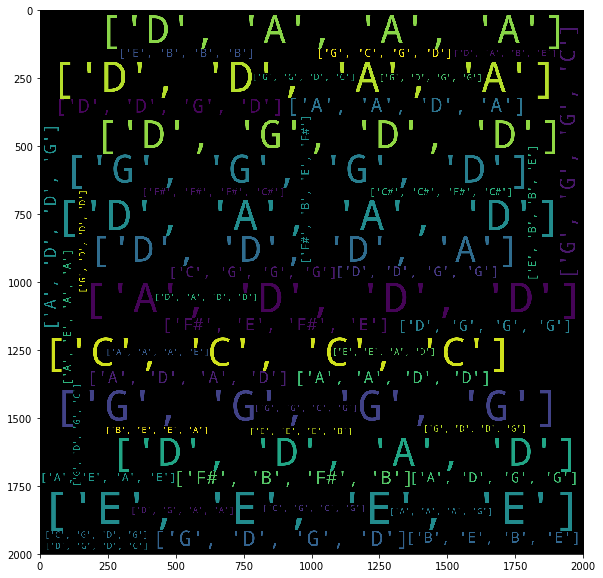

In [366]:
plot_wordcloud(a,50)

In [ ]:
# o_env = librosa.onset.onset_strength(y1, sr=sr)
# times = librosa.frames_to_time(np.arange(len(o_env)), sr=sr)
# onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

# import matplotlib.pyplot as plt
# D = np.abs(librosa.stft(y1))
# plt.figure()
# ax1 = plt.subplot(2, 1, 1)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                           x_axis='time', y_axis='log')
# plt.title('Power spectrogram')
# plt.subplot(2, 1, 2, sharex=ax1)
# plt.plot(times, o_env, label='Onset strength')
# plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
#             linestyle='--', label='Onsets')
# plt.axis('tight')
# plt.legend(frameon=True, fram1ealpha=0.75)

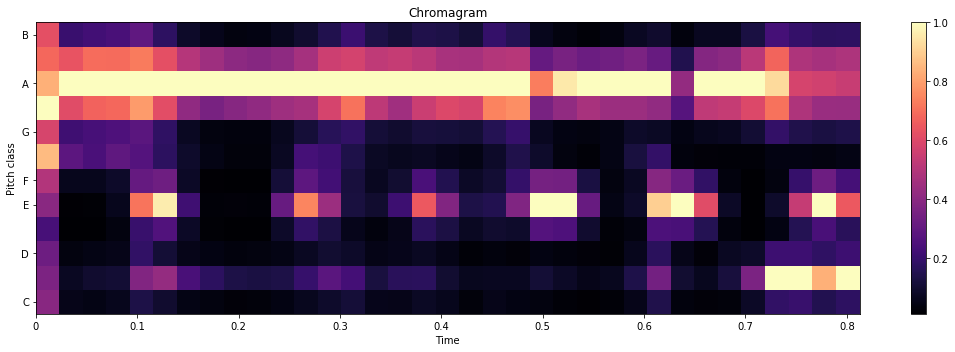

In [37]:
# for i in range(2):
# y,sr = librosa.load('./test/soda/'+ clip_list2[i])    
b = librosa.feature.chroma_stft(y=y1, sr=sr,  n_fft=1024, hop_length=512)
plt.figure(figsize=(15, 5))
librosa.display.specshow(b, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [ ]:
# ## split audio
# def chunk_wav(file, chunk_ms,folder, title):
#     chunks = make_chunks(file, chunk_ms)
#     # Export all of the individual chunks as wav files
#     for i, chunk in enumerate(chunks):
#         chunk_name = os.path.join("./test", folder,"{0}_chunk{1}.wav".format(title, i))
#         librosa.output.write_wav(chunk_name, chunk, sr)


In [170]:
# def n_gram(key_list, ngram):
#     k_list = [[word for word in line.split(",")] for line in key_list]
#     flattened = [val for sublist in k_list for val in sublist]
#     ngram_key = []
#     for i in range(int(len(flattened)/ngram)):
#         ngram_key.append(flattened[ngram*i : ngram*(i+1)])
#     count_ary = [[x,ngram_key.count(x)] for x in (ngram_key)]
#     unique = []
#     for item in count_ary:
#         if item not in unique:
#             unique.append(item)
#     unique = sorted(unique, key=lambda x:x[1], reverse = True)
#     return unique